In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import datetime as dt
import joblib
import warnings 

In [2]:
df = pd.read_csv("train.csv")
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
zero_percentage = (df == 0).mean() * 100
zero_percentage 

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 81, dtype: float64

In [5]:
high_zero_columns = zero_percentage[zero_percentage > 50].index
high_zero_columns

Index(['MasVnrArea', 'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

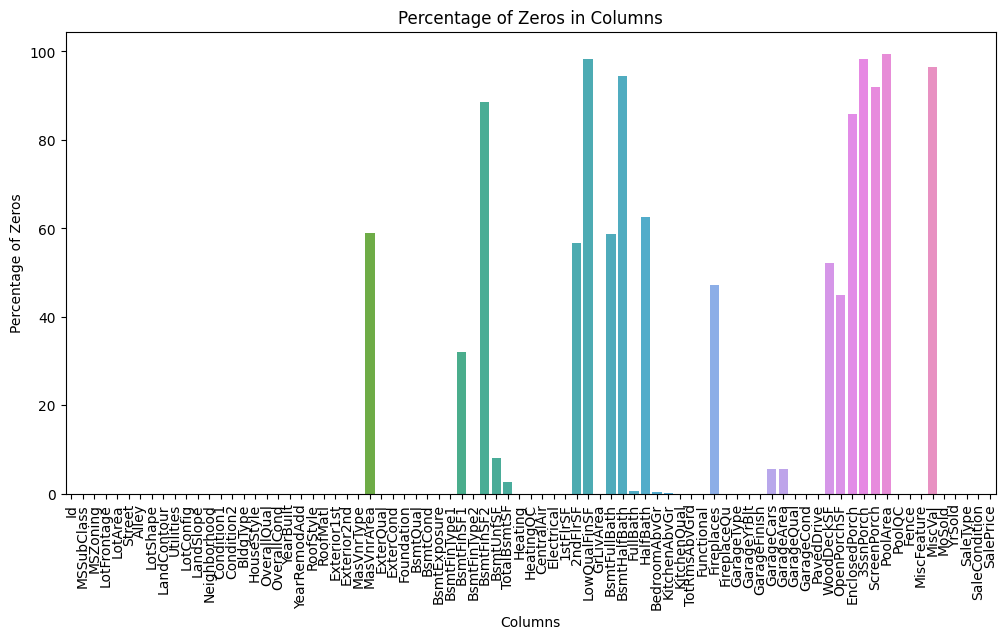

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(x=zero_percentage.index, y=zero_percentage.values)
plt.xticks(rotation=90)
plt.ylabel("Percentage of Zeros")
plt.xlabel("Columns")
plt.title("Percentage of Zeros in Columns")
plt.show()


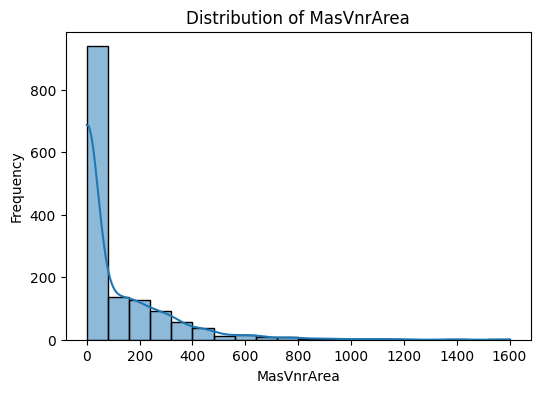

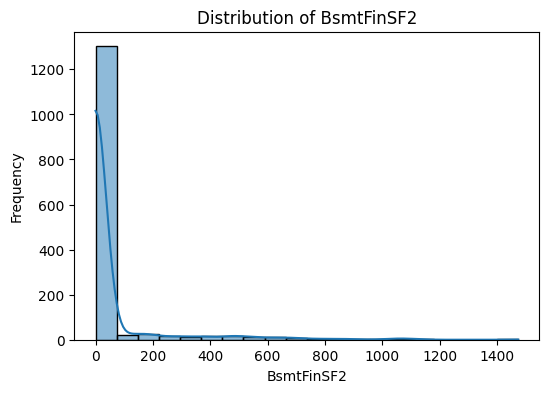

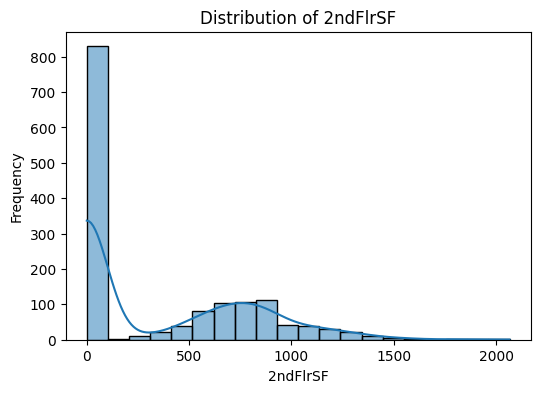

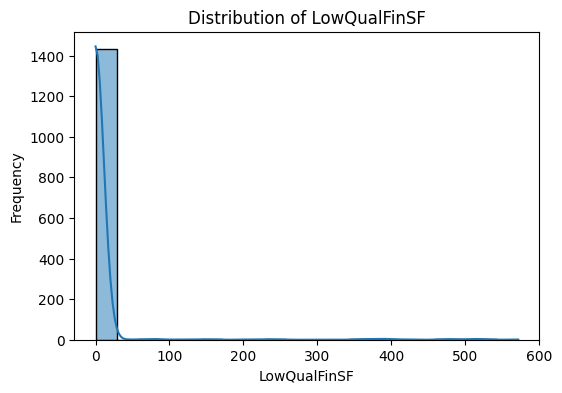

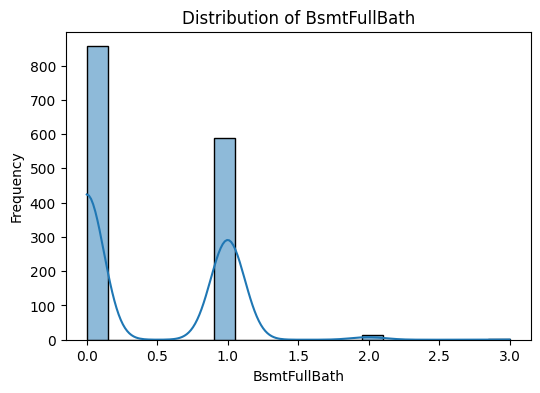

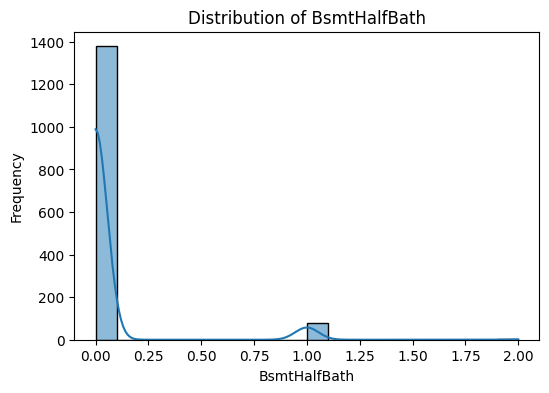

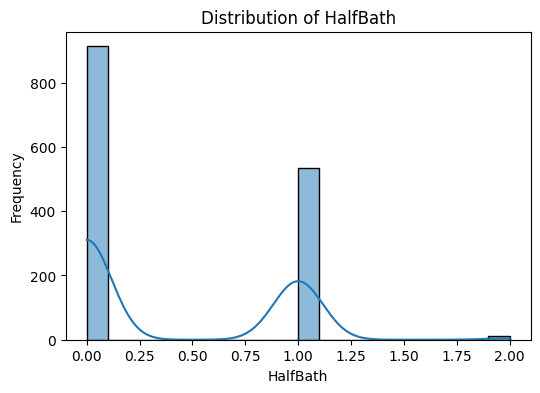

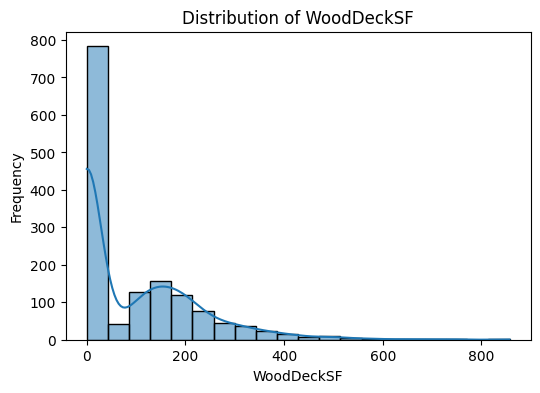

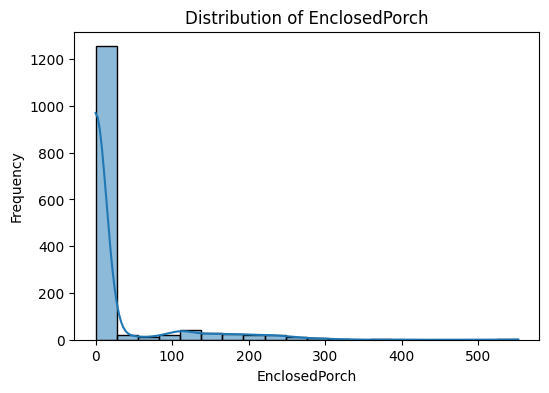

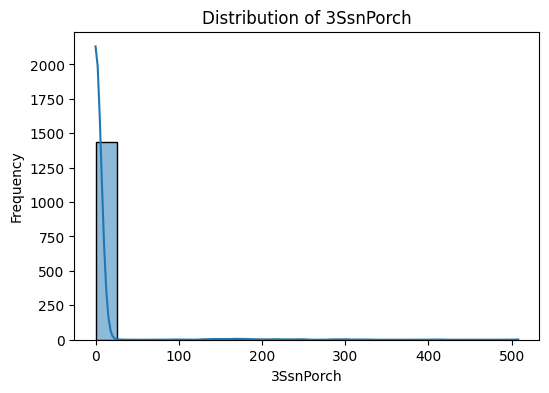

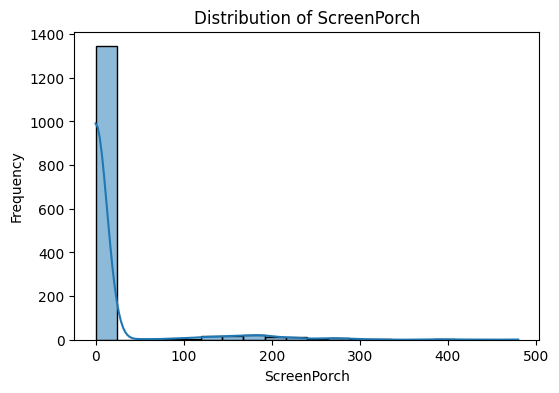

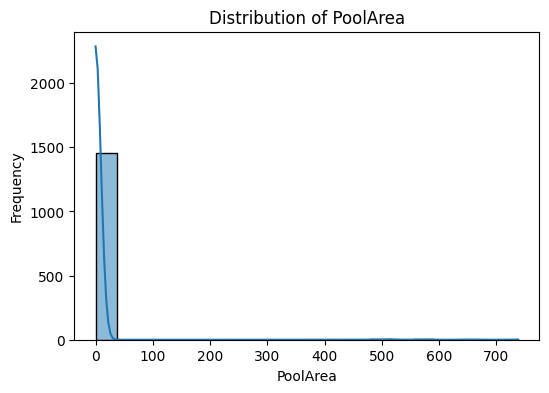

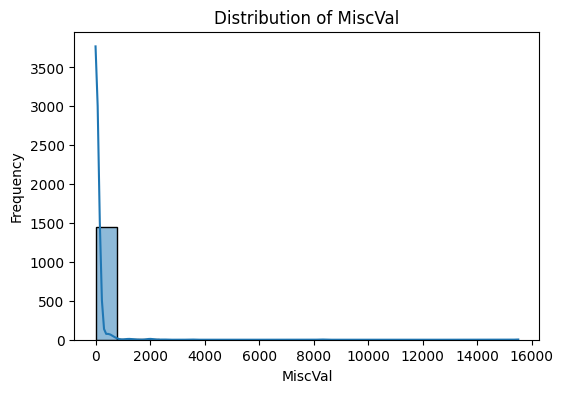

In [7]:
for col in high_zero_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()


In [6]:
df.drop(columns = high_zero_columns, inplace= True)

In [7]:
df.shape

(1460, 68)

In [8]:
df_zero =df
df_zero.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PavedDrive,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,Y,61,NaN,NaN,NaN,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,Y,0,NaN,NaN,NaN,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,Y,42,NaN,NaN,NaN,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,Y,35,NaN,NaN,NaN,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,Y,84,NaN,NaN,NaN,12,2008,WD,Normal,250000


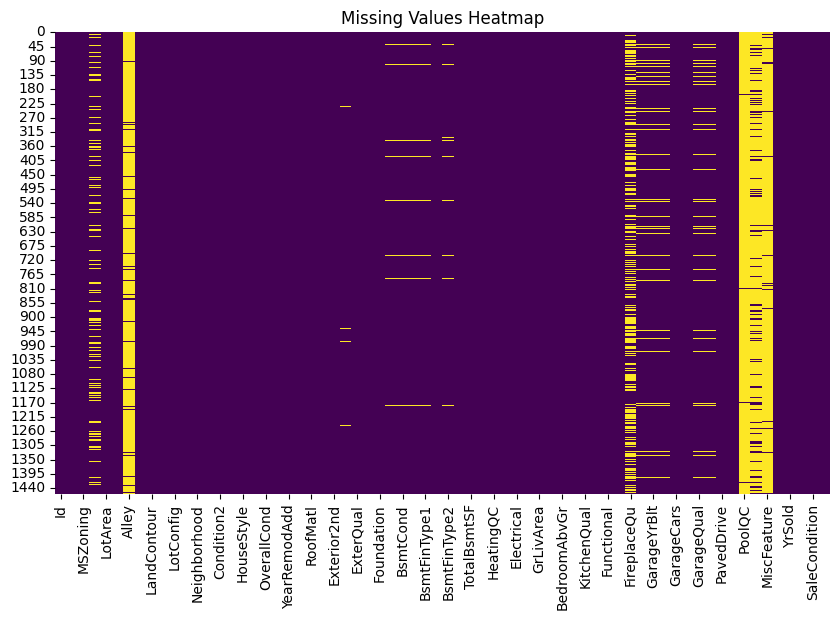

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_zero.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [10]:
features = list(df_zero.columns)

In [11]:
null_cutoff = df_zero.shape[0] / 2

In [12]:
drop_features = []

for feature in features:
    if df_zero[df_zero[feature].isna()].shape[0] > null_cutoff:
        drop_features.append(feature)

In [13]:
df_zero.drop(columns=drop_features, inplace=True)


In [14]:
column_count = df_zero.shape[1]
column_count

64

In [15]:
null_counts = df_zero.isnull().sum()
null_counts

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 64, dtype: int64

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(null_counts)

pd.reset_option('display.max_columns')
# pd.reset_option('display.max_rows')

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
GrLivArea          0
FullBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional   

In [17]:
df_zero.shape

(1460, 64)

In [18]:
df_zero["FireplaceQu"].isnull().sum()

690

In [19]:
df_zero.drop(columns = ['FireplaceQu'], inplace=True)
# df_zero

In [20]:
df_zero.drop(columns = ['LotFrontage'], inplace=True)
df_zero.shape

(1460, 62)

In [21]:
df_zero.drop(columns = ['Id'], inplace=True)


In [22]:
df_zero.shape

(1460, 61)

In [23]:
df_zero.head(5)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageArea,GarageQual,GarageCond,PavedDrive,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,548,TA,TA,Y,61,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,460,TA,TA,Y,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,608,TA,TA,Y,42,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,642,TA,TA,Y,35,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,836,TA,TA,Y,84,12,2008,WD,Normal,250000


In [24]:
null_count = df_zero.isnull().sum()
columns_with_null = null_count[null_count > 0]
columns_with_null

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [25]:
df_zero.drop(columns = ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'], inplace=True)

In [26]:
df_zero.shape

(1460, 56)

In [27]:
null_counts = df_zero.isnull().sum()
columns_with_null = null_counts[null_counts > 0]
columns_with_null

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
dtype: int64

In [28]:
df_zero['BsmtQual'].fillna(df_zero['BsmtQual'].mode()[0], inplace=True)
df_zero['BsmtCond'].fillna(df_zero['BsmtCond'].mode()[0], inplace=True)
df_zero['BsmtExposure'].fillna(df_zero['BsmtExposure'].mode()[0], inplace=True)
df_zero['BsmtFinType1'].fillna(df_zero['BsmtFinType1'].mode()[0], inplace=True)
df_zero['BsmtFinType2'].fillna(df_zero['BsmtFinType2'].mode()[0], inplace=True)
df_zero['Electrical'].fillna(df_zero['Electrical'].mode()[0], inplace=True)
df_zero['MasVnrType'].fillna(df_zero['Electrical'].mode()[0], inplace=True)


In [29]:
null_counts = df_zero.isnull().sum()
columns_with_null = null_counts[null_counts > 0]
columns_with_null

Series([], dtype: int64)

In [30]:
df_zero.shape

(1460, 56)

Remove Outliers

<AxesSubplot: >

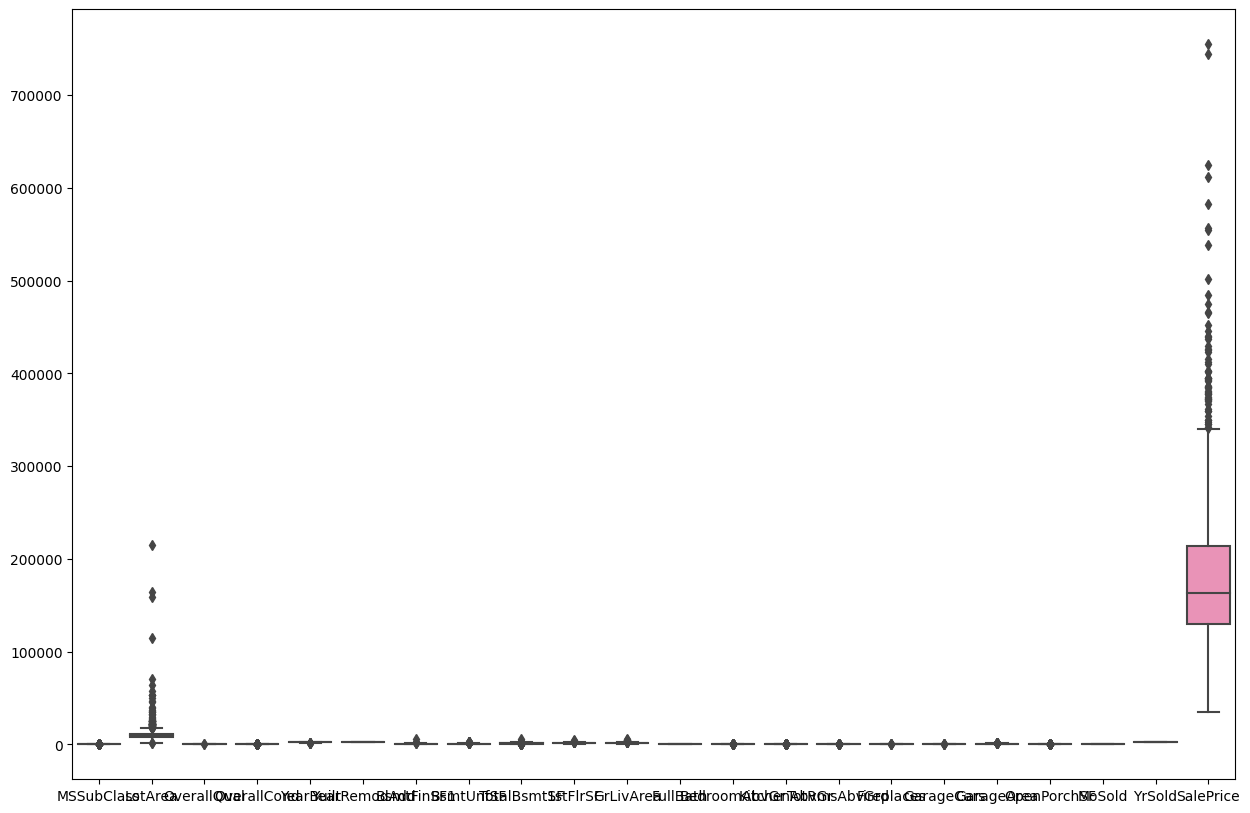

In [31]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.boxplot(data=df_zero, ax = ax)

C:\Users\sivac\AppData\Local\Temp\ipykernel_20216\882061647.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


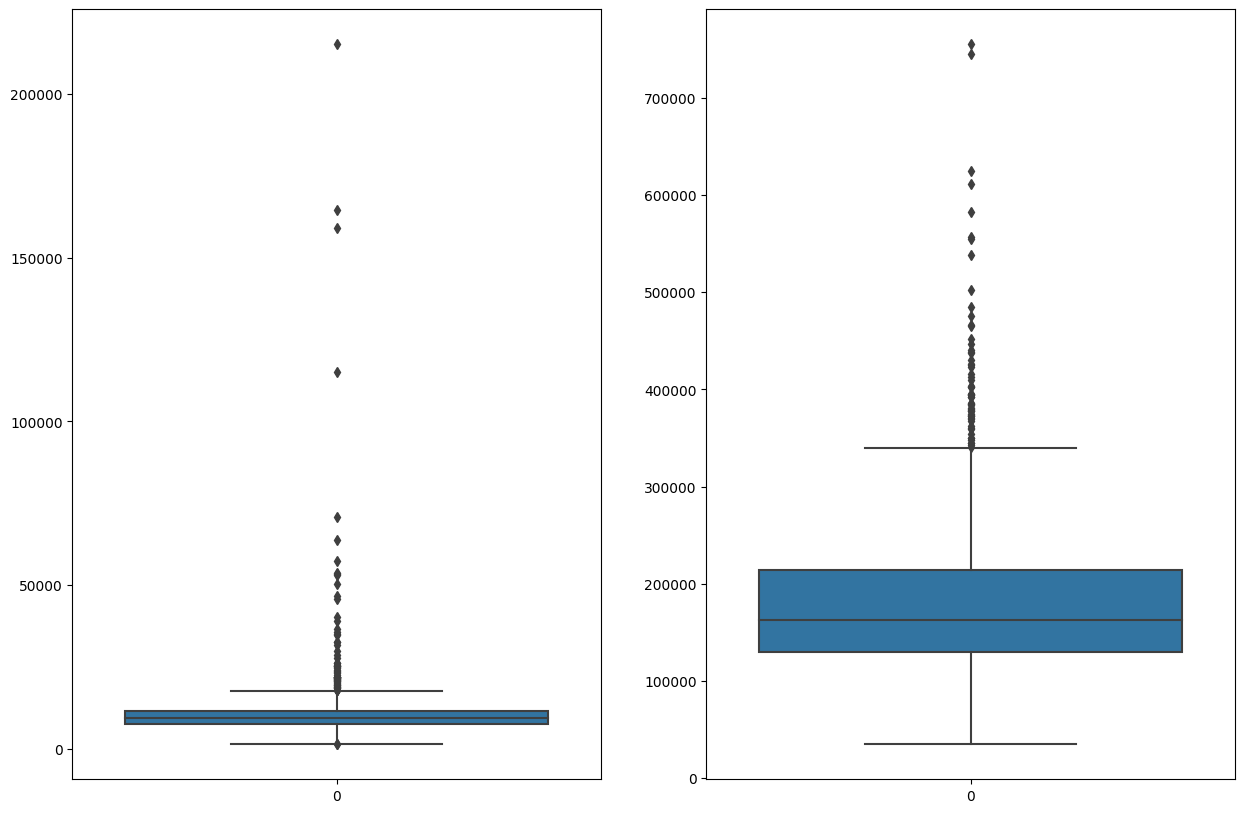

In [35]:
fig, ax = plt.subplots(1,2, figsize=(15,10))
sns.boxplot(data=df_zero['LotArea'], ax = ax[0])
sns.boxplot(data=df_zero['SalePrice'], ax = ax[1])
fig.show()

In [32]:
sample_df = df_zero.copy()

In [33]:
def remove_outliers(data, features):
  for feature in features:
    print(f'feature : {feature}')
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 -Q1
    print(f'Q1 = {Q1}, Q3 = {Q3}')
    low = Q1 - (1.5*IQR)
    high = Q3 + 1.5*IQR
    print(f'Low = {low}, High = {high}')

    data = data[(data[feature]>= low) & (data[feature]<= high)]

  return data

In [34]:
sample_df = remove_outliers(sample_df,  ['SalePrice', 'LotArea'])

feature : SalePrice
Q1 = 129975.0, Q3 = 214000.0
Low = 3937.5, High = 340037.5
feature : LotArea
Q1 = 7442.0, Q3 = 11316.5
Low = 1630.25, High = 17128.25


C:\Users\thura\AppData\Local\Temp\ipykernel_24820\4285061515.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


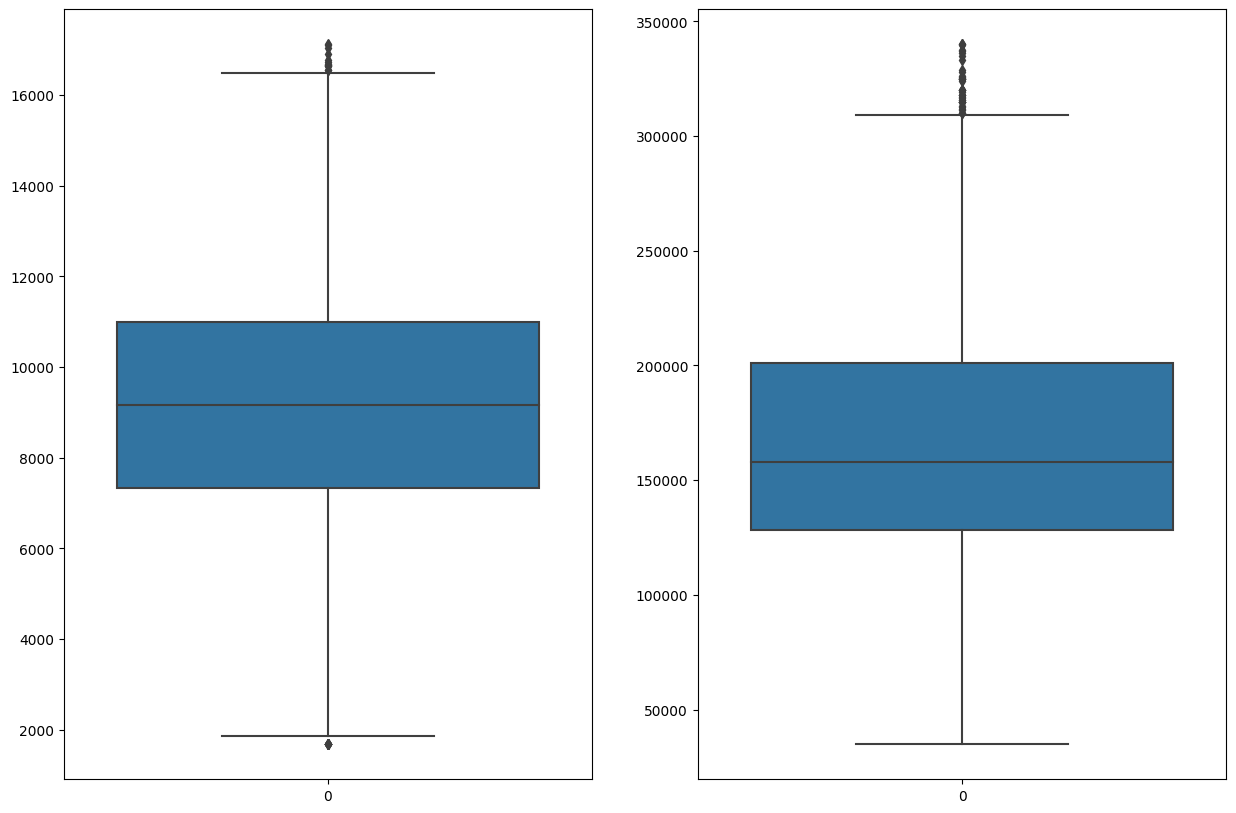

In [35]:
fig, ax = plt.subplots(1,2, figsize=(15,10))
sns.boxplot(data=sample_df['LotArea'], ax = ax[0])
sns.boxplot(data=sample_df['SalePrice'], ax = ax[1])
fig.show()

In [36]:
df = sample_df.copy()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1326 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1326 non-null   int64 
 1   MSZoning       1326 non-null   object
 2   LotArea        1326 non-null   int64 
 3   Street         1326 non-null   object
 4   LotShape       1326 non-null   object
 5   LandContour    1326 non-null   object
 6   Utilities      1326 non-null   object
 7   LotConfig      1326 non-null   object
 8   LandSlope      1326 non-null   object
 9   Neighborhood   1326 non-null   object
 10  Condition1     1326 non-null   object
 11  Condition2     1326 non-null   object
 12  BldgType       1326 non-null   object
 13  HouseStyle     1326 non-null   object
 14  OverallQual    1326 non-null   int64 
 15  OverallCond    1326 non-null   int64 
 16  YearBuilt      1326 non-null   int64 
 17  YearRemodAdd   1326 non-null   int64 
 18  RoofStyle      1326 non-null

In [38]:
df.shape

(1326, 56)

In [39]:
cols = list(df.columns)
cat_cols = []
num_cols = []
for item in cols:
  if df[item].dtype == "O":
    cat_cols.append(item)
  else :
    num_cols.append(item)

In [40]:
num_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'OpenPorchSF',
 'MoSold',
 'YrSold',
 'SalePrice']

In [41]:
cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [42]:
df.shape

(1326, 56)

In [43]:
def encode_fillnull(df, features, mapper_dict, target= None, plot=False):
  #removing null values
  for feature in features:
    #print(feature)
    df[feature].fillna('other', inplace=True)
    if target is not None:            # for training data
      # encoding preserved correlation with target feature
      values = list(df.groupby(feature)[target].mean().sort_values().index)
      scale_mapper = {value: index for index, value in enumerate(values)}
      encoded_feature = feature + "Encoded"
      df[encoded_feature] = df[feature].replace(scale_mapper)

      mapper_dict[feature] = values

    else :                # for test data
      values = mapper_dict[feature]
      scale_mapper = {value: index for index, value in enumerate(values)}
      encoded_feature = feature + "Encoded"
      df[encoded_feature] = df[feature].replace(scale_mapper)

  if plot == True:
    try :
      fig, ax = plt.subplots(nrows= len(features), ncols = 2, figsize=(15, 15))
      for index, feature in enumerate(features):
        encoded_feature = feature + "Encoded"
        sns.barplot(data = df, x=feature, y=target, ax=ax[index, 0])
        sns.barplot(data = df, x=encoded_feature, y=target, ax=ax[index, 1])
      fig.show()
    except :
        print("a")

In [44]:
mapper_df = dict()

In [45]:
encode_fillnull(df, cat_cols, mapper_df, target='SalePrice')

In [46]:
df.head(5)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,BsmtFinType2Encoded,HeatingEncoded,HeatingQCEncoded,CentralAirEncoded,ElectricalEncoded,KitchenQualEncoded,FunctionalEncoded,PavedDriveEncoded,SaleTypeEncoded,SaleConditionEncoded
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,3,5,4,1,4,2,5,2,5,4
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,3,5,4,1,4,1,5,2,5,4
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,3,5,4,1,4,2,5,2,5,4
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,3,5,3,1,4,2,5,2,5,2
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,3,5,4,1,4,2,5,2,5,4


In [47]:
df.shape

(1326, 90)

C:\Users\sivac\AppData\Local\Temp\ipykernel_20216\2053860949.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


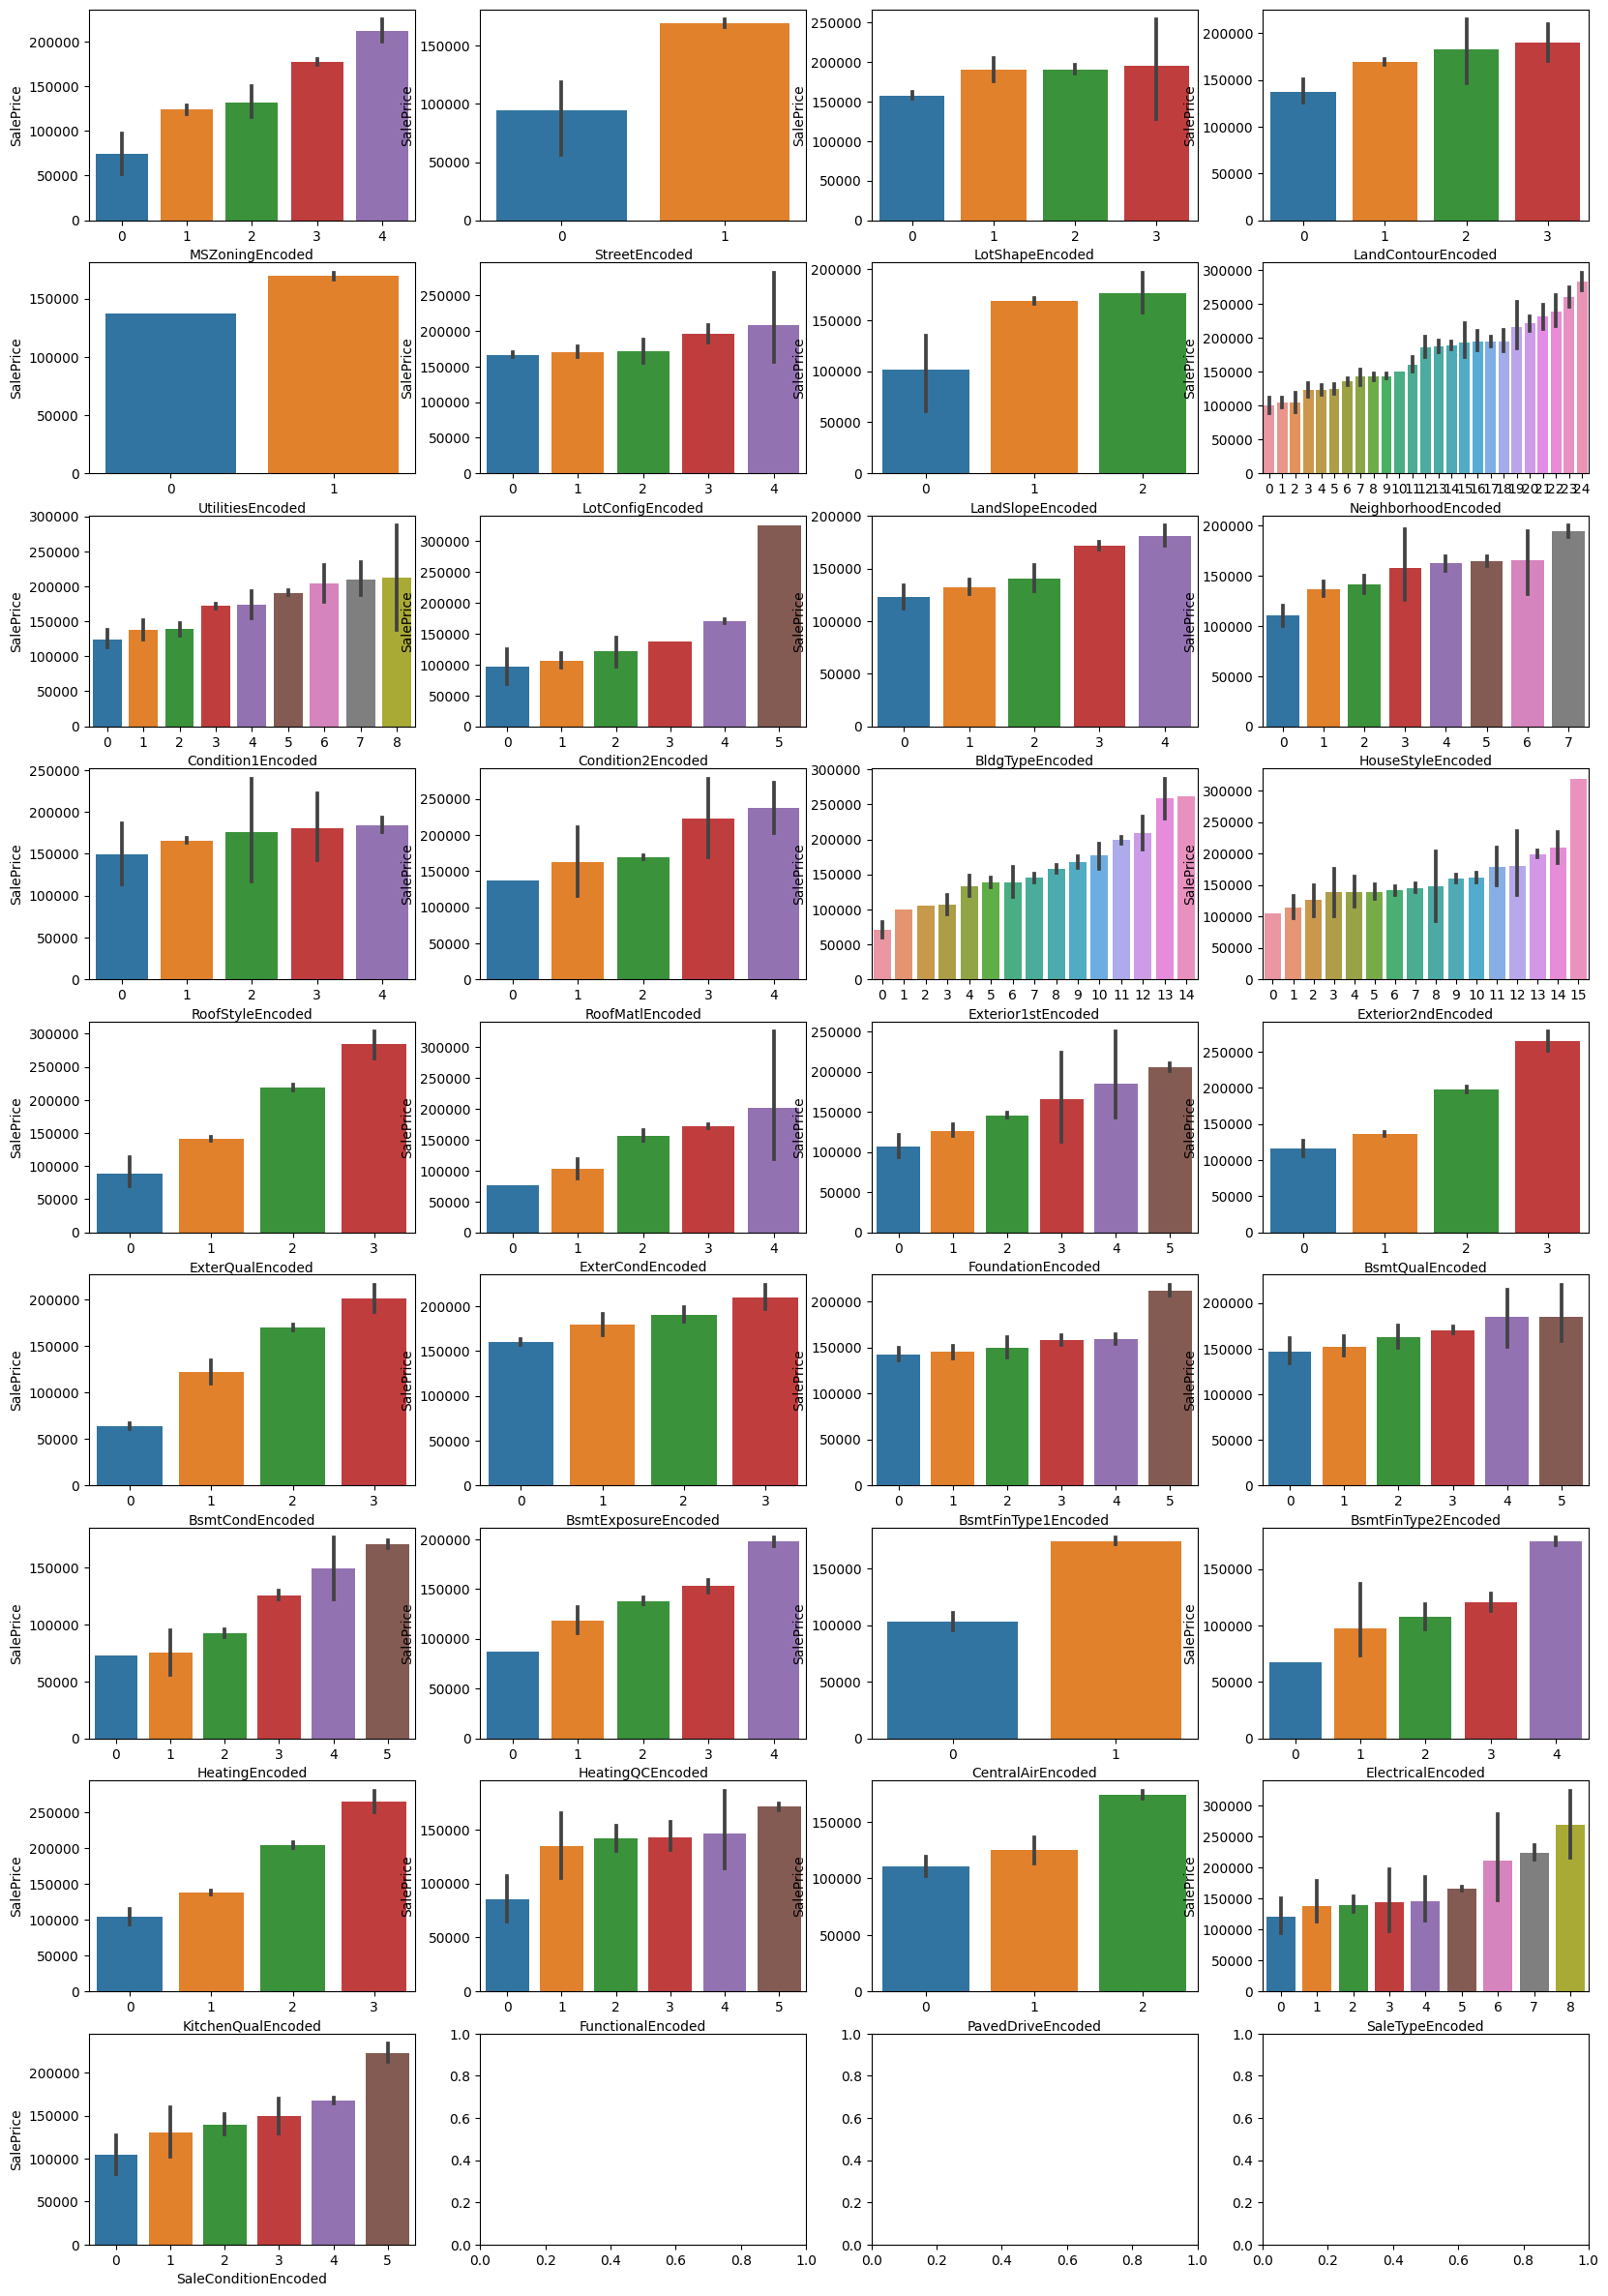

In [51]:
nrows = int(len(cat_cols)/4)+ 1
ncols = 4
fig, ax = plt.subplots(nrows= nrows, ncols = ncols, figsize=(20,30))
for index, feature in enumerate(cat_cols):
  i = int((index)/4)
  j = int((index)%4)
  sns.barplot(data=df, x=feature+"Encoded", y= 'SalePrice', ax=ax[i, j])
fig.show()

C:\Users\sivac\AppData\Local\Temp\ipykernel_12976\844604959.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


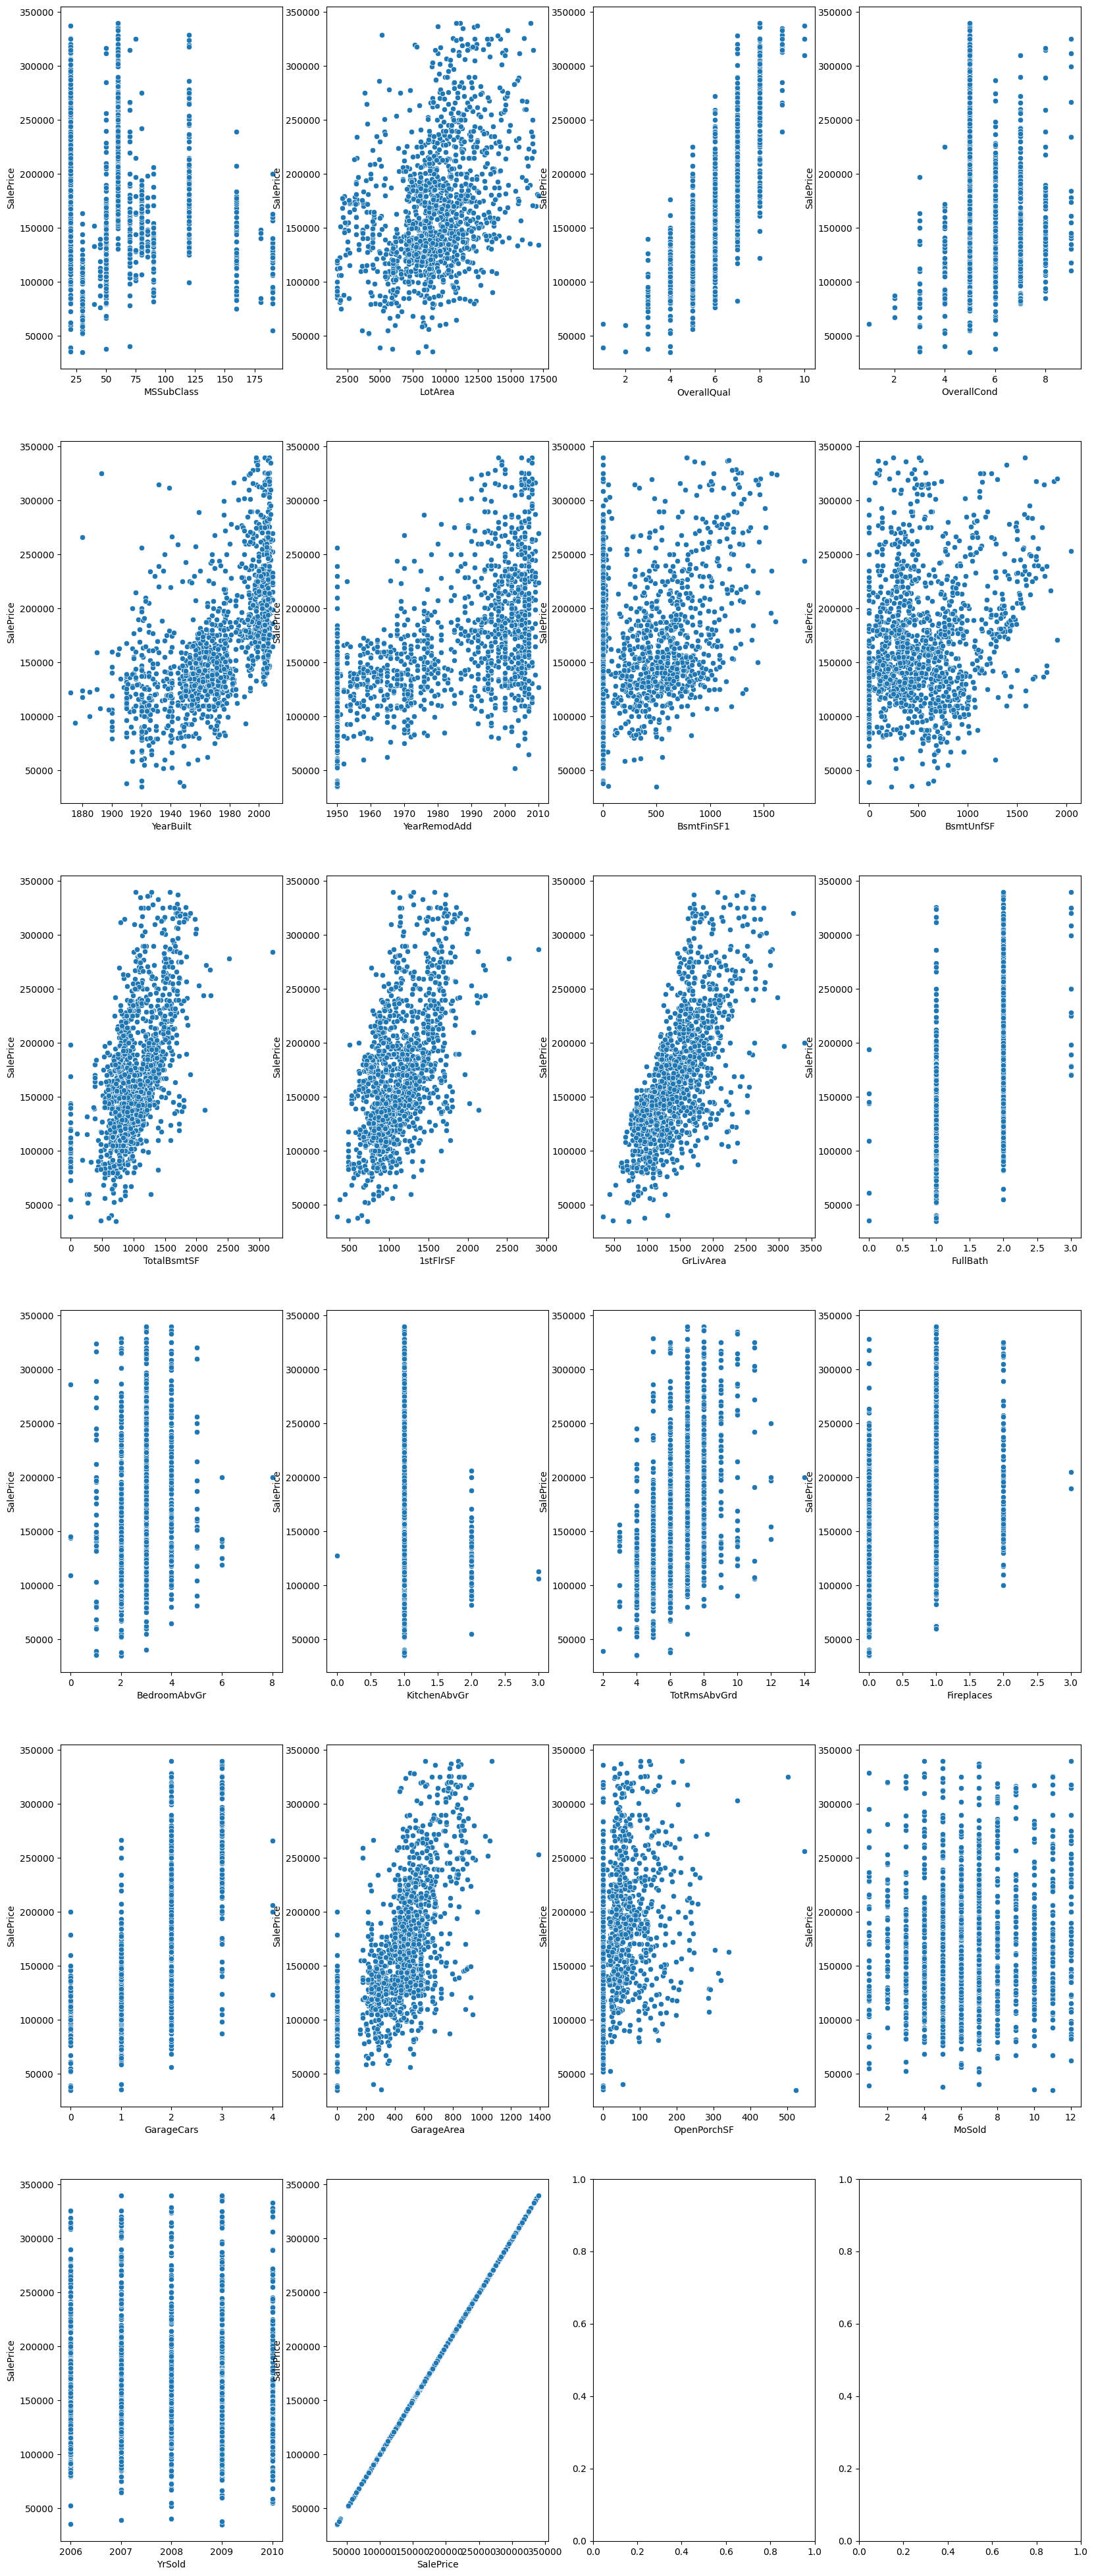

In [50]:
nrows = int(len(num_cols)/4)+ 1
ncols = 4
fig, ax = plt.subplots(nrows= nrows, ncols = ncols, figsize=(20,50))
for index, feature in enumerate(num_cols):
  i = int((index)/4)
  j = int((index)%4)
  sns.scatterplot(data=df, x=feature, y= 'SalePrice', ax=ax[i, j])
fig.show()

In [48]:
df.shape

(1326, 90)

In [49]:
df.drop(columns=cat_cols, inplace=True)


In [50]:
df.shape

(1326, 56)

Random forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [53]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [54]:
def fn_RandomFReg(data, target, n_est):
  X = data.copy()
  Y = X[target]
  print("No. of features used : ", len(X.columns)-1 )
  scale = MinMaxScaler()
  X_scaled = scale.fit_transform(X.drop(columns= [target]))
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.1, random_state=0)
  print('Training Features Shape: ', X_train.shape)
  print('Training Labels Shape: ', y_train.shape)
  print('Testing Features Shape: ', X_test.shape)
  print('Testing Labels Shape: ', y_test.shape)
  rf = RandomForestRegressor(n_estimators=n_est, random_state= 0)

  rf.fit(X_train, y_train)
  f_imp = list(rf.feature_importances_)

  score = rf.score(X_test, y_test)
  y_pred = rf.predict(X_test)
  abs_err = mean_absolute_error(y_test, y_pred)
  abs_per_err = mean_absolute_percentage_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print('R2 score(model) :', score)
  print('R2 score(actual) : ', r2)
  print('Mean absolute error : ', abs_err)
  print('Mean absolute percentage error : ', abs_per_err)
  print('R2 score(actual) : ', r2)

  return f_imp

In [55]:
f_imp = fn_RandomFReg(df, 'SalePrice', 500)

No. of features used :  55
Training Features Shape:  (1193, 55)
Training Labels Shape:  (1193,)
Testing Features Shape:  (133, 55)
Testing Labels Shape:  (133,)
R2 score(model) : 0.9201475556292933
R2 score(actual) :  0.9201475556292933
Mean absolute error :  12389.0732481203
Mean absolute percentage error :  0.07714484456440701
R2 score(actual) :  0.9201475556292933


In [56]:
feature_importance = pd.Series(f_imp, df.drop(columns= ['SalePrice']).columns)

In [57]:
feature_importance.sort_values(ascending=False, inplace=True)
features = list(feature_importance.index)
feature_importance

OverallQual             0.580004
GrLivArea               0.122004
NeighborhoodEncoded     0.056944
TotalBsmtSF             0.039749
GarageArea              0.033583
BsmtFinSF1              0.023479
1stFlrSF                0.017627
YearBuilt               0.013210
LotArea                 0.011236
YearRemodAdd            0.010448
OverallCond             0.007389
BsmtUnfSF               0.007306
CentralAirEncoded       0.006512
OpenPorchSF             0.005454
Fireplaces              0.004628
MoSold                  0.004242
Exterior2ndEncoded      0.004221
KitchenQualEncoded      0.004106
BsmtQualEncoded         0.003773
MSZoningEncoded         0.003452
MSSubClass              0.002576
GarageCars              0.002549
BsmtFinType1Encoded     0.002528
ExterQualEncoded        0.002156
YrSold                  0.002117
Exterior1stEncoded      0.002099
TotRmsAbvGrd            0.002087
BsmtExposureEncoded     0.002047
BedroomAbvGr            0.002020
FullBath                0.001561
MasVnrType

<AxesSubplot: >

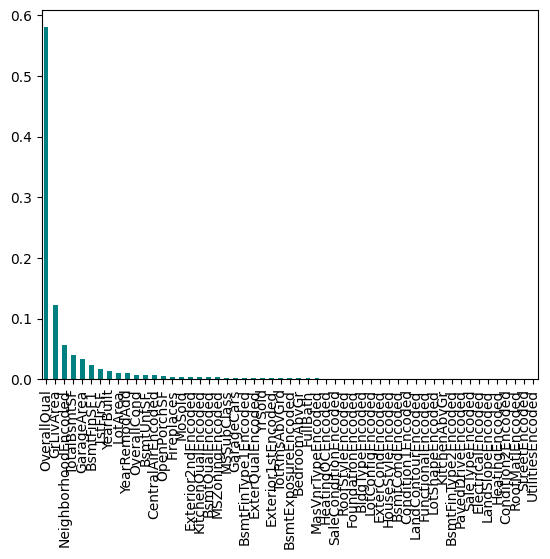

In [58]:
feature_importance.plot(kind= 'bar', color = 'teal')

In [59]:
final_feat = features[:15]+ ['SalePrice']

In [60]:
f_imp2 = fn_RandomFReg(df.loc[:, final_feat], 'SalePrice', 500)

No. of features used :  15
Training Features Shape:  (1193, 15)
Training Labels Shape:  (1193,)
Testing Features Shape:  (133, 15)
Testing Labels Shape:  (133,)
R2 score(model) : 0.9174987931649539
R2 score(actual) :  0.9174987931649539
Mean absolute error :  12652.194113498028
Mean absolute percentage error :  0.07846008430105429
R2 score(actual) :  0.9174987931649539


<AxesSubplot: >

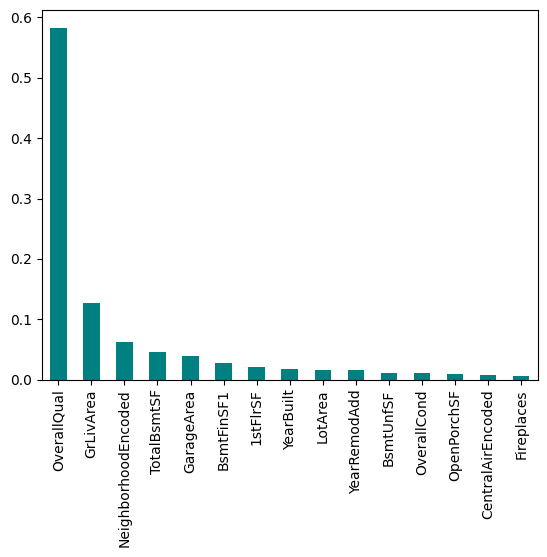

In [61]:
feature_importance2 = pd.Series(f_imp2, df.loc[:, final_feat].drop(columns= ['SalePrice']).columns)
feature_importance2.sort_values(ascending=False, inplace=True)
features = list(feature_importance2.index)
feature_importance2.plot(kind= 'bar', color = 'teal')

In [62]:
fn_RandomFReg(df.loc[:, final_feat], 'SalePrice', 10)

No. of features used :  15
Training Features Shape:  (1193, 15)
Training Labels Shape:  (1193,)
Testing Features Shape:  (133, 15)
Testing Labels Shape:  (133,)
R2 score(model) : 0.9011892962731888
R2 score(actual) :  0.9011892962731888
Mean absolute error :  13522.599248120301
Mean absolute percentage error :  0.08282221401107778
R2 score(actual) :  0.9011892962731888


[0.5709308199268155,
 0.13050960791180105,
 0.0698961524788274,
 0.051164597121145676,
 0.04051823409328464,
 0.027365583520299216,
 0.01953761761571626,
 0.014693682092030801,
 0.01340579171828609,
 0.02069795407443075,
 0.008993292712575405,
 0.010314804837490876,
 0.00814077870579679,
 0.007884579558384472,
 0.005946503633115122]

In [65]:
fn_RandomFReg(df.loc[:, final_feat], 'SalePrice', 2000)

No. of features used :  15
Training Features Shape:  (1193, 15)
Training Labels Shape:  (1193,)
Testing Features Shape:  (133, 15)
Testing Labels Shape:  (133,)
R2 score(model) : 0.9169544475898698
R2 score(actual) :  0.9169544475898698
Mean absolute error :  12623.728107465091
Mean absolute percentage error :  0.07840925796281445
R2 score(actual) :  0.9169544475898698


[0.5842336546174908,
 0.12745558516445074,
 0.062412957420244664,
 0.04559309191489721,
 0.03803539082590133,
 0.028431098359083862,
 0.020482983548915697,
 0.01871712848541283,
 0.01652144811984183,
 0.015184630395187953,
 0.010090762826514306,
 0.011191928559284818,
 0.007099527410982106,
 0.008492764663630416,
 0.006057047688161586]

In [63]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler

# Define your hyperparameter search space in 'random_grid'
random_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a RandomForestRegressor
rf = RandomForestRegressor()

# Set up the random search
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                               n_iter=100, cv=3, verbose=2, random_state=42,
                               n_jobs=-1)

# Assuming you have a DataFrame 'df' and you want to select specific columns as features
X = df.loc[:, final_feat]
target = 'SalePrice'
Y = X[target]

# Scale your features
scale = MinMaxScaler()
X_scaled = scale.fit_transform(X.drop(columns=[target]))

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.1, random_state=0)

# Print the shapes of your data
print('Training Features Shape: ', X_train.shape)
print('Training Labels Shape: ', y_train.shape)
print('Testing Features Shape: ', X_test.shape)
print('Testing Labels Shape: ', y_test.shape)

# Fit the random search model
rf_random.fit(X_train, y_train)


Training Features Shape:  (1193, 15)
Training Labels Shape:  (1193,)
Testing Features Shape:  (133, 15)
Testing Labels Shape:  (133,)
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [64]:
best_random = rf_random.best_estimator_

y_pred_best = best_random.predict(X_test)

In [65]:
r2_score(y_test, y_pred_best)

0.9147586332634241

In [66]:
mean_absolute_percentage_error(y_test, y_pred_best)

0.07889428518110636

In [67]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20,
 'bootstrap': True}

In [68]:
rf = RandomForestRegressor(n_estimators= 200, max_depth=20, min_samples_leaf=2, min_samples_split=1)

In [71]:
rf = RandomForestRegressor(min_samples_split=2)

In [72]:
X = df.loc[:, final_feat]
target = 'SalePrice'
Y = X[target]
scale = MinMaxScaler()
X_scaled = scale.fit_transform(X.drop(columns= [target]))

print('Training Features Shape: ', X_scaled.shape)
print('Training Labels Shape: ', Y.shape)
#print('Testing Features Shape: ', X_test.shape)
#print('Testing Labels Shape: ', y_test.shape)


Training Features Shape:  (1326, 15)
Training Labels Shape:  (1326,)


In [73]:
rf.fit(X_scaled, Y)

RandomForestRegressor()

In [74]:
model_filename = 'random_forest_regressor_model.joblib'
joblib.dump(rf_random.best_estimator_, model_filename)

['random_forest_regressor_model.joblib']